<a href="https://colab.research.google.com/github/tylerjmwhit/Maching_learning_pratice_notebooks/blob/main/Week13assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Exercise 1: Grouping of similar movies

Restructure the ratings.csv from the small MoveiLens dataset (Links to an external site.) (there is the larger dataset if you want to see how things run with more data) to create a dataframe with movies as rows and users as columns and the values as the corresponding rating (0 if the rating for the user doesn't exist)

Apply AgglomerativeClustering, DBSCAN and KMeans on this table and find the appropriate parameters to optimize the clustering.

List the movies (using movies.csv) of two of the larger clusters.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/My Drive/EE485_dataSets/ratings.csv')

In [ ]:
df = df.drop(['timestamp'],axis = 1)

In [ ]:
df_pivot = df.pivot(index = 'movieId', columns = 'userId', values = 'rating')

In [ ]:
df_pivot.fillna(0, inplace = True)
df_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix

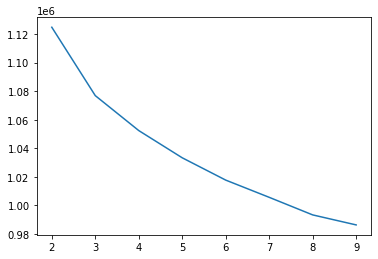

In [ ]:
#kmeans
errors = {}
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(df_pivot.values)
    errors[k] = km.inertia_
plt.plot(pd.Series(errors))

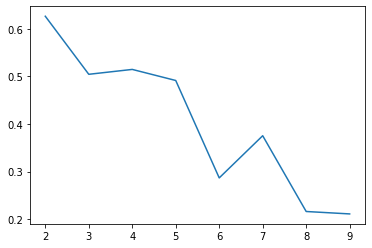

In [ ]:
#kmeans
from sklearn.metrics import silhouette_score
scores = {}
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(df_pivot.values)
    clusters = km.predict(df_pivot.values)
    scores[k] = silhouette_score(df_pivot.values, clusters)
plt.plot(pd.Series(scores))

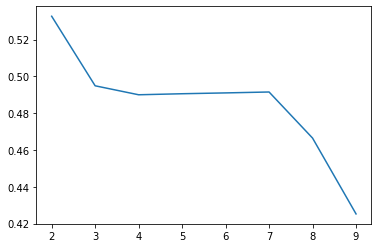

In [ ]:
#agglomerative clustering
scores = {}
for k in range(2,10):
    ac = AgglomerativeClustering(n_clusters=k)
    clusters = ac.fit_predict(df_pivot.values)
    scores[k] = silhouette_score(df_pivot.values, clusters)
plt.plot(pd.Series(scores))

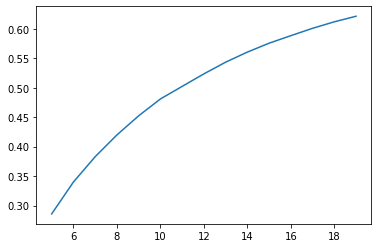

In [ ]:
#dbscan
scores = {}
for k in range(5,20):
    db = DBSCAN(eps=k, min_samples = 10)
    clusters = db.fit_predict(df_pivot.values)
    scores[k] = silhouette_score(df_pivot.values, clusters)
plt.plot(pd.Series(scores))

It looks like 4 clusters is the optimal amount of clusters for this data

In [ ]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df_pivot.values)
print(clusters)

[2 2 3 ... 1 1 1]


In [ ]:
df_pivot['cluster'] = clusters
df_pivot['cluster'].value_counts()

1    8416
3     683
0     474
2     151
Name: cluster, dtype: int64

In [ ]:
movie_id = np.array(df_pivot.index[(df_pivot['cluster'] == 1) | (df_pivot['cluster'] == 3)].tolist())
movie_id

array([     3,      4,      5, ..., 193585, 193587, 193609])

In [ ]:
df_movies = pd.read_csv('/content/drive/My Drive/EE485_dataSets/movies.csv')

In [ ]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
df_movies = df_movies[df_movies['movieId'].isin(movie_id)]

In [ ]:
#this dataframe contains all the movies in the two largest clusters
print(df_movies)

      movieId                                      title  \
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
6           7                             Sabrina (1995)   
7           8                        Tom and Huck (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  
2                      Comedy|Romance  
3                Comedy|Drama|Romance  
4                              Comedy  
6                      Comedy|Romance  
7                  Adventure|Children  
...                               ...  

Exercise 2:

Build an autoencoder that adds noise to the input images of the facial keypoints dataset, where the noise could be, for example:

- applying a blur filter on the image, or

- randomly increasing or decreasing the values of each pixel by a small range, or

- setting a random number of pixels to white (255/1) or black (0)


Plot the input images vs the output images and also run the network on a noisy image of yourself

In [ ]:
from keras import layers, models
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(96,96)))
model.add(layers.Dense(350, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(350, activation='relu'))
model.add(layers.Dense(9216, activation=None))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 350)               3225950   
                                                                 
 dense_5 (Dense)             (None, 100)               35100     
                                                                 
 dense_6 (Dense)             (None, 350)               35350     
                                                                 
 dense_7 (Dense)             (None, 9216)              3234816   
                                                                 
Total params: 6,531,216
Trainable params: 6,531,216
Non-trainable params: 0
_________________________________________________________________


In [ ]:
df_key = pd.read_csv('/content/drive/My Drive/EE485_dataSets/FacialKeypoints.csv')

In [ ]:
df_key = df_key.dropna(subset = ['Image'])
df_key.index = range(len(df_key))

In [ ]:
def makeIMG(n):
  Image1 = df_key['Image'][n]
  Image1 = Image1.split(" ")
  Image1 = np.array(Image1).astype(np.uint8)
  Image1 = Image1.reshape(96,96)
  return Image1

In [ ]:
images = []
for i in range(len(df_key.index)):
  images.append(makeIMG(i))
images = np.array(images)
images.reshape(-1,96,96,1)

array([[[[238],
         [236],
         [237],
         ...,
         [250],
         [250],
         [250]],

        [[235],
         [238],
         [236],
         ...,
         [249],
         [250],
         [251]],

        [[237],
         [236],
         [237],
         ...,
         [251],
         [251],
         [250]],

        ...,

        [[186],
         [183],
         [181],
         ...,
         [ 52],
         [ 57],
         [ 60]],

        [[189],
         [188],
         [207],
         ...,
         [ 61],
         [ 69],
         [ 78]],

        [[191],
         [184],
         [184],
         ...,
         [ 70],
         [ 75],
         [ 90]]],


       [[[219],
         [215],
         [204],
         ...,
         [ 92],
         [ 88],
         [ 84]],

        [[222],
         [219],
         [220],
         ...,
         [ 92],
         [ 88],
         [ 86]],

        [[231],
         [224],
         [212],
         ...,
         [ 77],
         [

In [ ]:
from PIL import Image, ImageFilter
pilImage = []
for i in range(len(df_key.index)):
  pil_images = Image.fromarray(makeIMG(i), mode='L')
  pil_images = pil_images.filter(ImageFilter.GaussianBlur(radius = 2))
  pil_images = np.asarray(pil_images)
  pilImage.append(pil_images)
pilImage = np.array(pilImage)

In [ ]:
pilImage.shape

(7049, 96, 96)

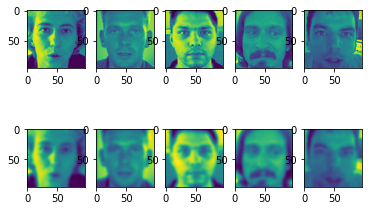

In [ ]:
for i in range(1, 6):
  ax = plt.subplot(2, 5, i)
  ax.imshow(images[i])
  ax2 = plt.subplot(2, 5, i+5)
  ax2.imshow(pilImage[i])

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(images, pilImage.reshape(-1,9216), epochs=50)

Epoch 1/50
221/221 [==============================] - 13s 58ms/step - loss: 602.8597
Epoch 2/50
221/221 [==============================] - 13s 57ms/step - loss: 412.3294
Epoch 3/50
221/221 [==============================] - 13s 58ms/step - loss: 387.2321
Epoch 4/50
221/221 [==============================] - 13s 58ms/step - loss: 374.2331
Epoch 5/50
221/221 [==============================] - 12s 56ms/step - loss: 366.1275
Epoch 6/50
221/221 [==============================] - 12s 56ms/step - loss: 363.0660
Epoch 7/50
221/221 [==============================] - 12s 56ms/step - loss: 355.8264
Epoch 8/50
221/221 [==============================] - 12s 56ms/step - loss: 353.5919
Epoch 9/50
221/221 [==============================] - 12s 56ms/step - loss: 348.8987
Epoch 10/50
221/221 [==============================] - 13s 57ms/step - loss: 347.6313
Epoch 11/50
221/221 [==============================] - 12s 56ms/step - loss: 355.0452
Epoch 12/50
221/221 [==============================] - 12s 56ms

In [ ]:
outs_model = model.predict(images).reshape((-1, 96,96))

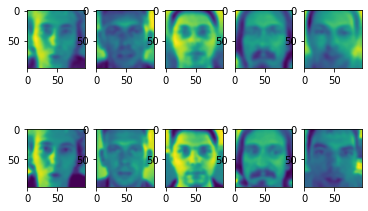

In [ ]:
for i in range(1, 6):
  ax = plt.subplot(2, 5, i)
  ax.imshow(outs_model[i])
  ax2 = plt.subplot(2, 5, i+5)
  ax2.imshow(pilImage[i])

looks like the model worked pretty well but it might have blurred the image from then just the gaussin blur did

In [ ]:
tar_image = np.array(Image.open('/content/drive/My Drive/EE485_dataSets/mattdamon.jpg').convert('L').resize((96,96)))

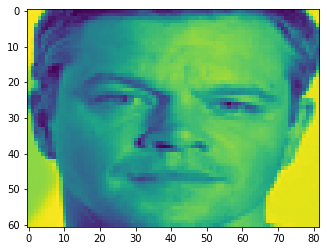

In [ ]:
indx = []
for i in range(21):
  indx.append(i+75)
tar_image = np.delete(tar_image, [indx], axis = 0)
tar_image = np.delete(tar_image, np.arange(0,14),axis = 0)
tar_image = np.delete(tar_image, [0,1,2,3,4,5,6], axis = 1)
tar_image = np.delete(tar_image, slice(82,96,1),axis = 1)
plt.imshow(tar_image)

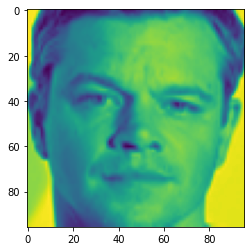

In [ ]:
targetimage = np.array(Image.fromarray(tar_image).resize((96,96)))
targetimage.reshape(96,96)
plt.imshow(targetimage)

In [ ]:
outs_damon = model.predict(targetimage.reshape(-1,96,96)).reshape((96,96))

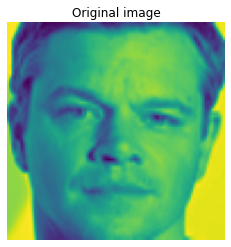

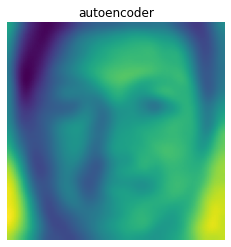

In [ ]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title('Original image')
plt.imshow(targetimage)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title('autoencoder')
plt.imshow(outs_damon)

overall I think my model might be overfit since it is not generalizing very well